# The Water
### Pool Water Section

In this section we will be measuring the liters of pool water in each neighborhood.

First, let's import the packages we need and our Pools dataset.

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

In [3]:
pools_data = pd.read_csv ("Pools.csv")
pools_data.head()

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899


Now let's add up the pools and spray parks in each neighborhood using value_counts()

In [4]:
Num = pd.Series(pools_data["neighborhood"].value_counts())
Num = Num.to_dict()
numPool = pd.DataFrame(columns = ["Neighborhood", "Value"])
hood = Num.keys()
count = Num.values()
numPool = pd.DataFrame({"Neighborhood":hood, "Value":count})
numPool

,Neighborhood,Value
0,South Side Flats,2
1,Highland Park,2
2,Bedford Dwellings,1
3,South Side Slopes,1
4,Westwood,1
5,Polish Hill,1
6,Beltzhoover,1
7,Allegheny Center,1
8,Sheraden,1
9,Squirrel Hill South,1


And let's make a bar graph.

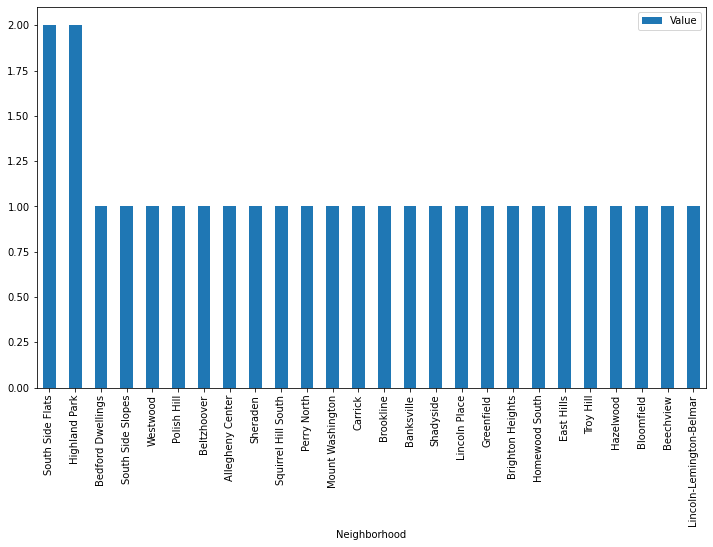

In [5]:
numPool.plot.bar(rot=90, x='Neighborhood', y='Value', figsize=(12,7))

This isn't particually useful because most of the neighborhoods only have one pool or spray park. Instead, let's compare using the capacity of the water attractions.

In [20]:
neigh = pools_data.loc[:,["neighborhood"]]
types = pools_data.loc[:,["type"]]
cap = pools_data.loc[:,["capacity"]]
poolType = pd.DataFrame()
poolType["Neighborhood"] = neigh
poolType["Type"] = types
poolType["Capacity"] = cap
poolType = pd.DataFrame(poolType)
poolType

,Neighborhood,Type,Capacity
0,Bedford Dwellings,Pool,538000.0
1,Banksville,Pool,166320.0
2,Beechview,Spray Park,NaN
3,Bloomfield,Pool,335000.0
4,Hazelwood,Spray Park,NaN
5,Troy Hill,Spray Park,NaN
6,East Hills,Spray Park,NaN
7,Highland Park,Pool,NaN
8,Highland Park,Pool,560242.0
9,Homewood South,Pool,171075.0


There NaN value for the spary parks, so let's say the capacity for those is approximately 50 liters.

In [45]:
poolType.fillna(50, inplace=True)
poolType

,Neighborhood,Type,Capacity
0,Bedford Dwellings,Pool,538000.0
1,Banksville,Pool,166320.0
2,Beechview,Spray Park,50.0
3,Bloomfield,Pool,335000.0
4,Hazelwood,Spray Park,50.0
5,Troy Hill,Spray Park,50.0
6,East Hills,Spray Park,50.0
7,Highland Park,Pool,50.0
8,Highland Park,Pool,560242.0
9,Homewood South,Pool,171075.0


Now we combine the sum of all the liters in water attractions in each neighborhood.

In [52]:
sorted_pools = sorted_pools.groupby("Neighborhood")["Capacity"].sum()
sorted_pools = pd.DataFrame(sorted_pools)
sorted_pools = sorted_pools.sort_values("Capacity", ascending=False)
sorted_pools

,Capacity
Neighborhood,
Highland Park,560292.0
Bedford Dwellings,538000.0
Brookline,417657.0
Mount Washington,356000.0
Bloomfield,335000.0
South Side Flats,312800.0
Sheraden,278000.0
Allegheny Center,271000.0
Carrick,224100.0


Looks like Highland Park is in the lead! Let's see what the graph looks like.

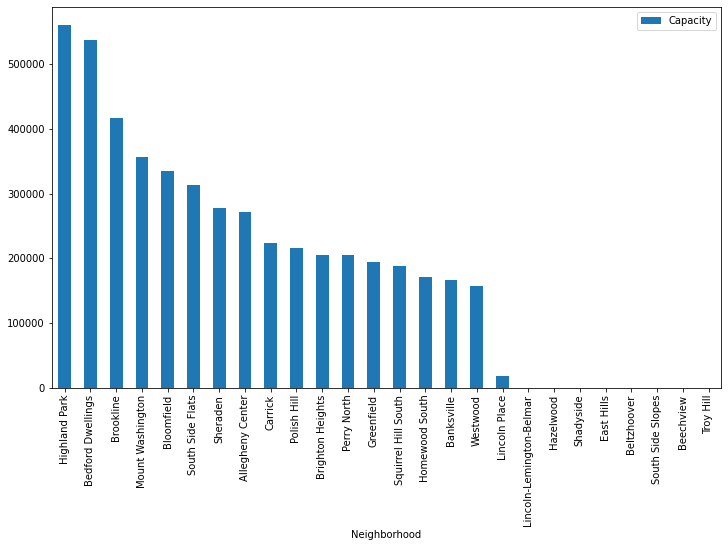

In [57]:
sorted_pools.plot.bar(rot=90, y='Capacity', figsize=(12,7))

And merge the data with our map of the neighborhoods in Pittsburgh.

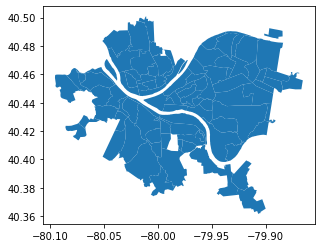

In [47]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

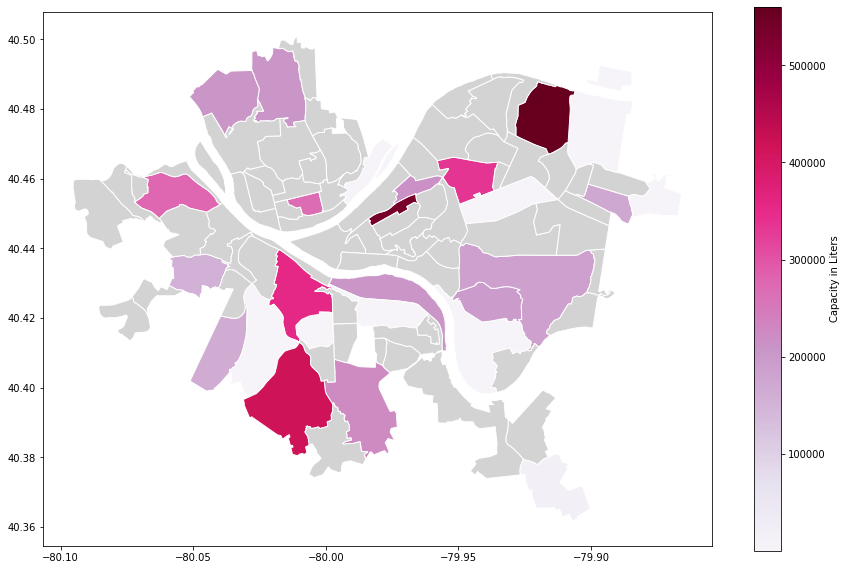

In [48]:
pools_map = neighborhoods.merge(poolType, how='left', left_on='hood', right_on='Neighborhood')
pools_map.plot(column = 'Capacity', cmap='PuRd', edgecolor="white", legend=True, legend_kwds={'label': "Capacity in Liters"}, 
               figsize=(15, 10), missing_kwds={"color": "lightgrey"})

# Conclusion
Since our overall metric will be in liters, we don't have to convert this dataset into anything else. The neighborhood with the most pool water is Highland Park with 560292.0 liters.